# Survival Analysis - HR, OD, RR

## a)

**For given data determine the variable anemia. Assume that women (0) are anemic if their hemoglobin < 12, and men (1) if their hemoglobin < 13. Then determine the HR, RR and OR statistics and interpret the results.**

In [1]:
dane = read.table("http://theta.edu.pl/wp-content/uploads/2021/10/Dane.csv", header = TRUE, sep=';',dec = '.')
head(dane)

,Start,Stop,SEX,height,weight,NTproBNP,Hemoglobina,sTfR
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2008-12-23,2011-07-01,1,177,100,4.127134,12.24621,0.7561220
2,2008-12-23,2011-07-01,0,170,84,5.351858,12.89075,0.9669838
3,2008-12-19,2011-07-01,0,179,76,4.276666,14.34096,0.7030975
4,2008-12-19,2011-07-01,1,186,121,5.036953,14.50209,0.8837675
5,2008-12-18,2011-07-01,1,157,56,5.726848,16.27457,0.8586616
6,2008-12-18,2011-07-01,1,169,74,5.288267,14.50209,0.7793249


In [5]:
#Selecting the 3rd and 7th columns
head(dane[, c(3,7)])

,SEX,Hemoglobina
,<int>,<dbl>
1,1,12.24621
2,0,12.89075
3,0,14.34096
4,1,14.50209
5,1,16.27457
6,1,14.50209


In [7]:
dim(dane)

[1] 87  8

In [6]:
summary(dane)

    Start               Stop                SEX             height     
 Length:87          Length:87          Min.   :0.0000   Min.   :153.0  
 Class :character   Class :character   1st Qu.:1.0000   1st Qu.:170.5  
 Mode  :character   Mode  :character   Median :1.0000   Median :176.0  
                                       Mean   :0.8046   Mean   :176.4  
                                       3rd Qu.:1.0000   3rd Qu.:182.0  
                                       Max.   :1.0000   Max.   :195.0  
     weight          NTproBNP      Hemoglobina         sTfR       
 Min.   : 51.00   Min.   :1.356   Min.   :11.28   Min.   :0.5710  
 1st Qu.: 79.00   1st Qu.:4.858   1st Qu.:13.54   1st Qu.:0.7056  
 Median : 86.00   Median :5.927   Median :14.34   Median :0.7930  
 Mean   : 87.14   Mean   :5.705   Mean   :14.39   Mean   :0.8108  
 3rd Qu.: 98.50   3rd Qu.:6.677   3rd Qu.:15.47   3rd Qu.:0.8734  
 Max.   :131.00   Max.   :8.723   Max.   :18.05   Max.   :1.2413  

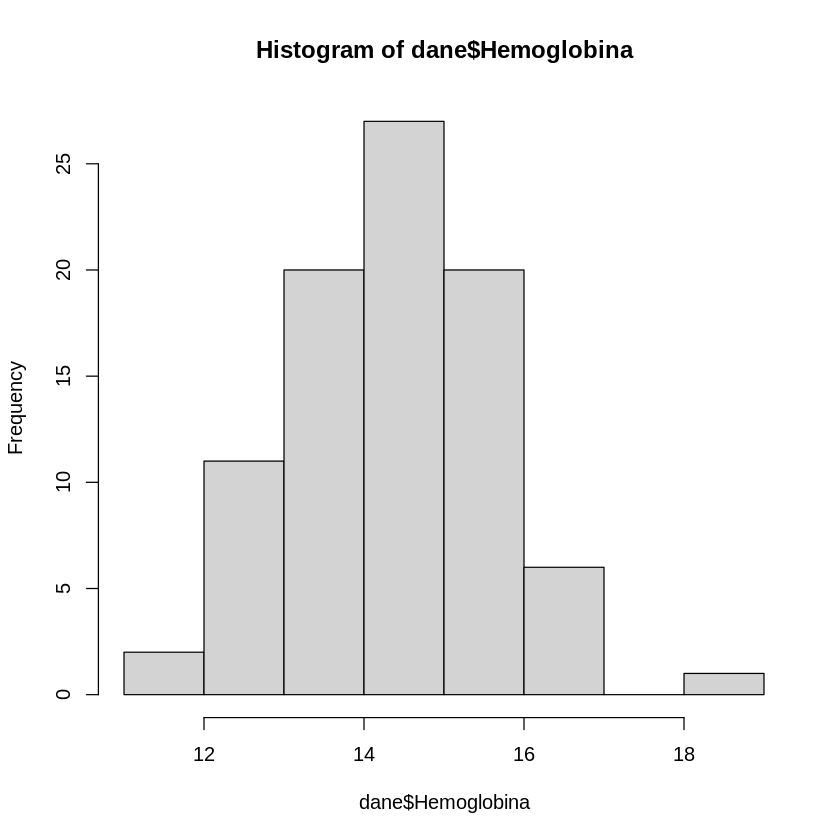

In [8]:
hist(dane$Hemoglobina)

In [10]:
dane$anemia <- 0 # Assigning an initial value of 0 for all individuals in the new column "anemia"
dane[dane[, 3] == 0, 7] # Hemoglobin values for womens

[1] 12.89075 14.34096 12.72962 13.53529 12.08508 11.92394 13.21302 12.40735
 [9] 13.37415 13.69642 14.01869 13.85756 14.17983 13.05189 12.72962 12.89075
[17] 13.05189

In [11]:
dane[dane[,3] == 1,7]# Hemoglobin values for mens

[1] 12.24621 14.50209 16.27457 14.50209 13.37415 15.95230 11.27941 16.59684
 [9] 14.17983 12.56848 14.34096 13.53529 15.63004 14.82436 14.34096 14.50209
[17] 15.79117 15.79117 15.46890 18.04705 15.46890 12.89075 14.50209 13.85756
[25] 14.66323 14.50209 15.79117 15.79117 15.30777 15.79117 14.34096 14.66323
[33] 14.66323 16.43571 15.79117 14.34096 12.40735 15.14663 13.85756 14.17983
[41] 15.95230 13.21302 13.21302 13.85756 15.63004 13.85756 14.82436 14.66323
[49] 13.53529 13.37415 16.27457 16.11344 15.79117 14.50209 13.53529 12.72962
[57] 13.85756 16.11344 15.30777 14.34096 14.50209 13.69642 15.30777 15.46890
[65] 15.79117 15.79117 14.34096 14.98550 14.82436 14.17983

In [13]:
dane$anemia[dane$SEX == 0 & dane$Hemoglobin < 12] <- 1 # Encoding women with anemia
dane$anemia[dane$SEX == 1 & dane$Hemoglobin < 13] <- 1 # Encoding men with anemia

In [15]:
table(dane$anemia) 


 0  1 
80  7 

80 individuals without anemia and 7 with anemia

In [16]:
table(dane$SEX, dane$anemia) 

   
     0  1
  0 16  1
  1 64  6

 1 woman with anemia and 6 men with anemia, vertically represents gender, horizontally represents anemia.

In [17]:
dane[dane$anemia == 1, c(3,7,9)]

,SEX,Hemoglobina,anemia
,<int>,<dbl>,<dbl>
1,1,12.24621,1
10,1,11.27941,1
13,1,12.56848,1
27,1,12.89075,1
33,0,11.92394,1
44,1,12.40735,1
70,1,12.72962,1


In [18]:
Oa = 1; Ob = 6; p = 7/87; Ea = 17 * p; Eb = 70 * p

#Where:

#p represents the ratio of individuals with anemia to the total population.
#Oa represents the number of individuals with anemia in group A (women).
#Ob represents the number of individuals with anemia in group B (men).
#Ea represents the expected number of individuals with anemia in group A (women).
#Eb represents the expected number of individuals with anemia in group B (men).
#Using the given values:

#Oa = 1 (1 woman with anemia)
#Ob = 6 (6 men with anemia)
#p = 7/87 (ratio of 7 individuals with anemia out of the total population of 87)
#Ea = 17 * p (expected number of women with anemia)

Where:

* p represents the ratio of individuals with anemia to the total population.
* Oa represents the number of individuals with anemia in group A (women).
* Ob represents the number of individuals with anemia in group B (men).
* Ea represents the expected number of individuals with anemia in group A (women).
* Eb represents the expected number of individuals with anemia in group B (men).

Using the given values:

* Oa = 1 (1 woman with anemia)
* Ob = 6 (6 men with anemia)
* p = 7/87 (ratio of 7 individuals with anemia out of the total population of 87)
* Ea = 17 * p (expected number of women with anemia)

In [20]:
#Hazard ratio (HR)
HR = (Ob / Eb) / (Oa / Ea)
HR



[1] 1.457143

The hazard ratio (HR) is calculated as the ratio of the hazard (risk) of anemia in men compared to women. In this case, the HR is approximately 1.45.

Interpretation: The risk of anemia in men is 1.45 times higher than in women.

In [ ]:
#Relative Risk (RR)

RR = (6/70) / (1/17)
RR



RR is the ratio of the number of individuals with anemia to the total number of individuals in each group (men to women)

The relative risk (RR) is calculated as the ratio of the risk of anemia in men to the risk of anemia in women. In this case, the RR is approximately 1.45.

Interpretation: The risk of anemia in men is 1.45 times higher than in women.

In [21]:
#Odds Ratio (OR)
OR = (6/64) / (1/16)
OR

[1] 1.5

Odds Ratio (OR)

The ratio of the number of individuals with anemia to the number of individuals without anemia in each group (men to women)

The odds ratio (OR) is calculated as the ratio of the odds of having anemia in men to the odds of having anemia in women. In this case, the OR is approximately 1.5.

Interpretation: The odds of having anemia in men are approximately 1.5 times higher than in women.

##  b)

**For the above data, determine the survival time of each patient, and then
determine the 3-year "follow-up" and KaplanMeier survival function estimator.**

In [22]:
dane$FU = as.Date(dane$Stop) - as.Date(dane$Start)
dane$FU = as.integer(as.Date(dane$Stop) - as.Date(dane$Start))

In [24]:
#Creating data where a period longer than 3 years (1095 days) is represented as 1095
dane$FU2 <- dane$FU
dane$FU2[dane$FU > 1095] <- 1095

#Creating data where individuals with anemia detected after the 3rd year of the study are assigned a value of 0 (indicating no anemia)
dane$anemia2 <- dane$anemia
dane$anemia2[dane$FU > 1095 & dane$anemia == 1] <- 0

In [25]:
library(survival)

In [26]:
km = survfit(Surv(dane$FU2, dane$anemia2) ~ 1)
km

Call: survfit(formula = Surv(dane$FU2, dane$anemia2) ~ 1)

      n events median 0.95LCL 0.95UCL
[1,] 87      6     NA      NA      NA

The results show that there were 87 individuals included in the analysis. Out of these, 6 events (such as deaths or other defined outcomes) were observed. However, the median survival time and the 95% confidence interval for the survival estimates are not provided in the output (NA represents missing values). Therefore, further interpretation of the survival estimates cannot be made based on this specific output.

In [27]:
summary(km)

Call: survfit(formula = Surv(dane$FU2, dane$anemia2) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  920     87       1    0.989  0.0114        0.966        1.000
  932     80       1    0.976  0.0167        0.944        1.000
  939     76       1    0.963  0.0208        0.923        1.000
  981     61       1    0.948  0.0258        0.898        0.999
 1003     56       1    0.931  0.0304        0.873        0.992
 1043     44       1    0.909  0.0363        0.841        0.983

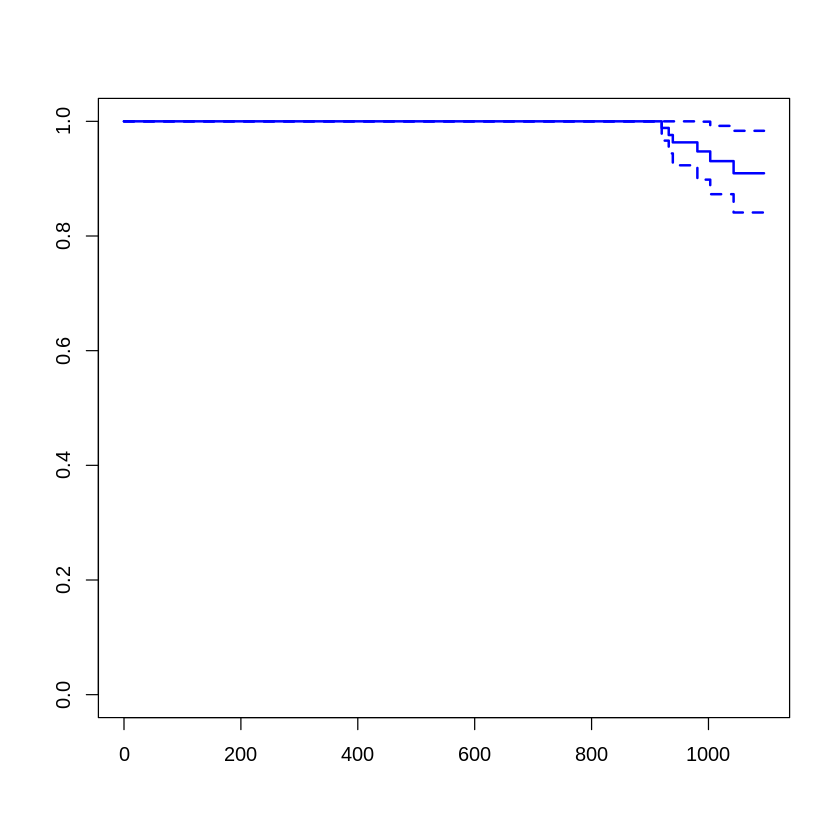

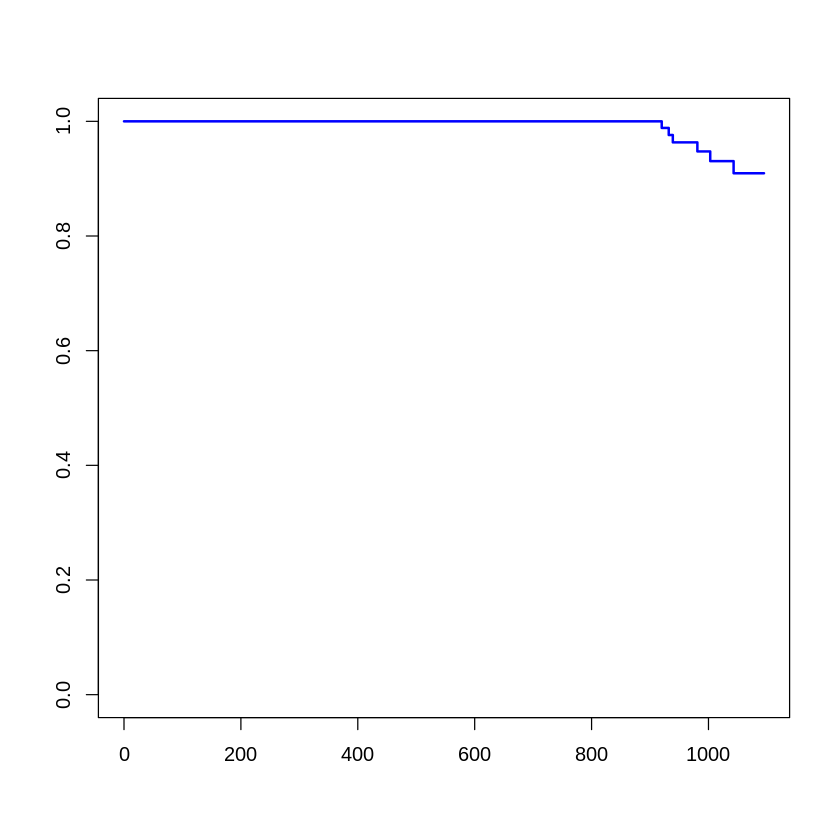

In [28]:
plot(km, col="blue", lwd = 2)
plot(km, col="blue", lwd = 2, conf.int = FALSE) #without confidence interval

The absence of a median means that it is not possible to determine the exact value of the median survival time based on the available data. This can be due to various reasons such as insufficient follow-up time, no events (e.g., deaths) occurring, or a small sample size in the study. In such cases, it is difficult to ascertain the central value of survival time for the analyzed group.

## c)

**For previous data, determine the median survival and its 95% confidence interval, and
determine the hazard function for the first and third years.**

In [29]:
#it is impossible to determine the median, because less than half of the people became ill

In [30]:
km

Call: survfit(formula = Surv(dane$FU2, dane$anemia2) ~ 1)

      n events median 0.95LCL 0.95UCL
[1,] 87      6     NA      NA      NA

In [31]:
summary(km)

Call: survfit(formula = Surv(dane$FU2, dane$anemia2) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  920     87       1    0.989  0.0114        0.966        1.000
  932     80       1    0.976  0.0167        0.944        1.000
  939     76       1    0.963  0.0208        0.923        1.000
  981     61       1    0.948  0.0258        0.898        0.999
 1003     56       1    0.931  0.0304        0.873        0.992
 1043     44       1    0.909  0.0363        0.841        0.983

In [32]:
H1 = 0/ (365 * 87)
H1 # hazard ratio for day
H1 * 365 # hazard ratio for year

[1] 0

[1] 0

No individuals with anemia were detected in the first year 

In [33]:
dane2 = dane[, c(11, 12)]
dane2$FU2 =dane$FU2 - 730

In [34]:
colSums(dane2)

FU2 anemia2 
  26242       6

In [36]:
sum(dane2$FU2)

[1] 26242

So much time survived people (with anemia, healthy and censored)

In [37]:
sum(dane2$anemia2) 

[1] 6

The number of people with anemia

In [38]:
H3 = sum(dane2$anemia2) / sum(dane2$FU2) # hazard ratio for day
H3 # hazard ratio for day
H3 * 365 # hazard ratio for year

[1] 0.0002286411

[1] 0.08345401

Given these hazard ratio values, it suggests that the risk of the event occurring in the group associated with the higher hazard ratio is significantly lower compared to the group associated with the lower hazard ratio.